In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,power_transform
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [3]:
#df=pd.read_csv('flight_price1.csv')
#df

,Unnamed: 0,Company,depart_time,flight_time,arrival_time,num_stops,stop_location,source,destination,days_remaining,price
0,0,SpiceJet,08:45,02 h 55 m,11:40,0,None,Delhi,Chennai,0,"₹ 6,312"
1,1,IndiGo,07:10,02 h 50 m,10:00,0,None,Delhi,Chennai,0,"₹ 6,584"
2,2,IndiGo,08:30,02 h 50 m,11:20,0,None,Delhi,Chennai,0,"₹ 6,584"
3,3,IndiGo,12:55,02 h 55 m,15:50,0,None,Delhi,Chennai,0,"₹ 6,584"
4,4,IndiGo,17:25,02 h 50 m,20:15,0,None,Delhi,Chennai,0,"₹ 6,584"
...,...,...,...,...,...,...,...,...,...,...,...
1580,1580,IndiGo,06:25,08 h,14:25,1,Dehradun,Delhi,Kolkata,40,"₹ 6,390"
1581,1581,IndiGo,12:45,05 h 30 m,18:15,1,Lucknow,Delhi,Kolkata,40,"₹ 6,442"
1582,1582,IndiGo,07:55,10 h 20 m,18:15,1,Lucknow,Delhi,Kolkata,40,"₹ 6,442"
1583,1583,"AirAsia, IndiGo",13:00,05 h 15 m,18:15,1,Lucknow,Delhi,Kolkata,40,"₹ 7,296"


In [5]:
#df.columns

Index(['Unnamed: 0', 'Company', 'depart_time', 'flight_time', 'arrival_time',
       'num_stops', 'stop_location', 'source', 'destination', 'days_remaining',
       'price'],
      dtype='object')

In [6]:
#df.shape

(1585, 11)

In [8]:
#df=df.drop(columns=['Unnamed: 0'])

In [9]:
#df.columns

Index(['Company', 'depart_time', 'flight_time', 'arrival_time', 'num_stops',
       'stop_location', 'source', 'destination', 'days_remaining', 'price'],
      dtype='object')

In [10]:
#df

,Company,depart_time,flight_time,arrival_time,num_stops,stop_location,source,destination,days_remaining,price
0,SpiceJet,08:45,02 h 55 m,11:40,0,None,Delhi,Chennai,0,"₹ 6,312"
1,IndiGo,07:10,02 h 50 m,10:00,0,None,Delhi,Chennai,0,"₹ 6,584"
2,IndiGo,08:30,02 h 50 m,11:20,0,None,Delhi,Chennai,0,"₹ 6,584"
3,IndiGo,12:55,02 h 55 m,15:50,0,None,Delhi,Chennai,0,"₹ 6,584"
4,IndiGo,17:25,02 h 50 m,20:15,0,None,Delhi,Chennai,0,"₹ 6,584"
...,...,...,...,...,...,...,...,...,...,...
1580,IndiGo,06:25,08 h,14:25,1,Dehradun,Delhi,Kolkata,40,"₹ 6,390"
1581,IndiGo,12:45,05 h 30 m,18:15,1,Lucknow,Delhi,Kolkata,40,"₹ 6,442"
1582,IndiGo,07:55,10 h 20 m,18:15,1,Lucknow,Delhi,Kolkata,40,"₹ 6,442"
1583,"AirAsia, IndiGo",13:00,05 h 15 m,18:15,1,Lucknow,Delhi,Kolkata,40,"₹ 7,296"


In [11]:
#df.dtypes

Company           object
depart_time       object
flight_time       object
arrival_time      object
num_stops          int64
stop_location     object
source            object
destination       object
days_remaining     int64
price             object
dtype: object

In [17]:
#df['depart_time'].str.split(':')

0       [08, 45]
1       [07, 10]
2       [08, 30]
3       [12, 55]
4       [17, 25]
          ...   
1580    [06, 25]
1581    [12, 45]
1582    [07, 55]
1583    [13, 00]
1584    [11, 20]
Name: depart_time, Length: 1585, dtype: object

In [23]:
#df['depart_time'].apply(lambda x:x.split(':'))

0       [08, 45]
1       [07, 10]
2       [08, 30]
3       [12, 55]
4       [17, 25]
          ...   
1580    [06, 25]
1581    [12, 45]
1582    [07, 55]
1583    [13, 00]
1584    [11, 20]
Name: depart_time, Length: 1585, dtype: object

In [25]:
#df['depart_time']=df['depart_time'].apply(lambda x:int(x.split(':')[0])+int(x.split(':')[1])/60)

In [30]:
#df.iloc[50:65,1]

50    17.833333
51    21.000000
52     5.416667
53     5.666667
54    19.583333
55     0.333333
56     5.583333
57     7.000000
58     9.250000
59    10.250000
60    15.500000
61    16.750000
62     7.250000
63    11.166667
64     9.000000
Name: depart_time, dtype: float64

In [31]:
#df['arrival_time']=df['arrival_time'].apply(lambda x:int(x.split(':')[0])+int(x.split(':')[1])/60)

In [33]:
#df.dtypes

Company            object
depart_time       float64
flight_time        object
arrival_time      float64
num_stops           int64
stop_location      object
source             object
destination        object
days_remaining      int64
price              object
dtype: object

In [39]:
#df['flight_time'].apply(lambda x:int(x.split(' ')[0])+int(x.split(' ')[2])/60 if x.split(' ')[1]=='h' & x.split(' ')[3]=='m' elif x.split(' ')[1]=='h' int(x.split(' ')[0]) elif x.split(' ')[1]=='m' int(x.split(' ')[0])/60 )

SyntaxError: invalid syntax (<ipython-input-39-65a6a30c84a1>, line 1)

In [44]:
#def parse_values(x):
    if len(x.split(' '))==4:
        return int(x.split(' ')[0])+int(x.split(' ')[2])/60
    elif x.split(' ')[1]=='h':
        return int(x.split(' ')[0])
    elif x.split(' ')[1]=='m':
        return int(x.split(' ')[0])/60

In [47]:
#df['flight_time'].apply(parse_values).values[250:270]

array([ 5.08333333, 16.75      ,  4.75      ,  7.08333333,  8.        ,
        8.25      ,  6.41666667,  7.41666667,  7.33333333,  8.83333333,
        5.33333333,  9.08333333,  9.33333333,  3.66666667,  4.25      ,
        5.91666667,  5.25      ,  4.83333333,  6.58333333,  5.91666667])

In [48]:
#df['flight_time']=df['flight_time'].apply(parse_values)

In [49]:
#df

,Company,depart_time,flight_time,arrival_time,num_stops,stop_location,source,destination,days_remaining,price
0,SpiceJet,8.750000,2.916667,11.666667,0,None,Delhi,Chennai,0,"₹ 6,312"
1,IndiGo,7.166667,2.833333,10.000000,0,None,Delhi,Chennai,0,"₹ 6,584"
2,IndiGo,8.500000,2.833333,11.333333,0,None,Delhi,Chennai,0,"₹ 6,584"
3,IndiGo,12.916667,2.916667,15.833333,0,None,Delhi,Chennai,0,"₹ 6,584"
4,IndiGo,17.416667,2.833333,20.250000,0,None,Delhi,Chennai,0,"₹ 6,584"
...,...,...,...,...,...,...,...,...,...,...
1580,IndiGo,6.416667,8.000000,14.416667,1,Dehradun,Delhi,Kolkata,40,"₹ 6,390"
1581,IndiGo,12.750000,5.500000,18.250000,1,Lucknow,Delhi,Kolkata,40,"₹ 6,442"
1582,IndiGo,7.916667,10.333333,18.250000,1,Lucknow,Delhi,Kolkata,40,"₹ 6,442"
1583,"AirAsia, IndiGo",13.000000,5.250000,18.250000,1,Lucknow,Delhi,Kolkata,40,"₹ 7,296"


In [50]:
#df.to_csv('flight_price_final.csv')

In [3]:
#df=pd.read_csv('flight_price_final.csv')

In [4]:
#df

,Unnamed: 0,Company,depart_time,flight_time,arrival_time,num_stops,stop_location,source,destination,days_remaining,price
0,0,SpiceJet,8.750000,2.916667,11.666667,0,None,Delhi,Chennai,0,"₹ 6,312"
1,1,IndiGo,7.166667,2.833333,10.000000,0,None,Delhi,Chennai,0,"₹ 6,584"
2,2,IndiGo,8.500000,2.833333,11.333333,0,None,Delhi,Chennai,0,"₹ 6,584"
3,3,IndiGo,12.916667,2.916667,15.833333,0,None,Delhi,Chennai,0,"₹ 6,584"
4,4,IndiGo,17.416667,2.833333,20.250000,0,None,Delhi,Chennai,0,"₹ 6,584"
...,...,...,...,...,...,...,...,...,...,...,...
1580,1580,IndiGo,6.416667,8.000000,14.416667,1,Dehradun,Delhi,Kolkata,40,"₹ 6,390"
1581,1581,IndiGo,12.750000,5.500000,18.250000,1,Lucknow,Delhi,Kolkata,40,"₹ 6,442"
1582,1582,IndiGo,7.916667,10.333333,18.250000,1,Lucknow,Delhi,Kolkata,40,"₹ 6,442"
1583,1583,"AirAsia, IndiGo",13.000000,5.250000,18.250000,1,Lucknow,Delhi,Kolkata,40,"₹ 7,296"


In [10]:
#df['price']=df['price'].apply(lambda x:int(x.split(' ')[1].split(',')[0]+x.split(' ')[1].split(',')[1]))

In [12]:
#df.dtypes

Unnamed: 0          int64
Company            object
depart_time       float64
flight_time       float64
arrival_time      float64
num_stops           int64
stop_location      object
source             object
destination        object
days_remaining      int64
price               int64
dtype: object

In [13]:
#df.to_csv('flight_price_final.csv')

In [3]:
df=pd.read_csv('flight_price_final.csv')

In [4]:
df

,Unnamed: 0,Unnamed: 0.1,Company,depart_time,flight_time,arrival_time,num_stops,stop_location,source,destination,days_remaining,price
0,0,0,SpiceJet,8.750000,2.916667,11.666667,0,None,Delhi,Chennai,0,6312
1,1,1,IndiGo,7.166667,2.833333,10.000000,0,None,Delhi,Chennai,0,6584
2,2,2,IndiGo,8.500000,2.833333,11.333333,0,None,Delhi,Chennai,0,6584
3,3,3,IndiGo,12.916667,2.916667,15.833333,0,None,Delhi,Chennai,0,6584
4,4,4,IndiGo,17.416667,2.833333,20.250000,0,None,Delhi,Chennai,0,6584
...,...,...,...,...,...,...,...,...,...,...,...,...
1580,1580,1580,IndiGo,6.416667,8.000000,14.416667,1,Dehradun,Delhi,Kolkata,40,6390
1581,1581,1581,IndiGo,12.750000,5.500000,18.250000,1,Lucknow,Delhi,Kolkata,40,6442
1582,1582,1582,IndiGo,7.916667,10.333333,18.250000,1,Lucknow,Delhi,Kolkata,40,6442
1583,1583,1583,"AirAsia, IndiGo",13.000000,5.250000,18.250000,1,Lucknow,Delhi,Kolkata,40,7296


In [5]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Company', 'depart_time', 'flight_time',
       'arrival_time', 'num_stops', 'stop_location', 'source', 'destination',
       'days_remaining', 'price'],
      dtype='object')

In [6]:
df=df.drop(columns=['Unnamed: 0','Unnamed: 0.1'])

In [7]:
df.columns

Index(['Company', 'depart_time', 'flight_time', 'arrival_time', 'num_stops',
       'stop_location', 'source', 'destination', 'days_remaining', 'price'],
      dtype='object')

# EDA

In [8]:
df.isnull().sum()

#no null values present

Company           0
depart_time       0
flight_time       0
arrival_time      0
num_stops         0
stop_location     0
source            0
destination       0
days_remaining    0
price             0
dtype: int64

In [9]:
df.dtypes

Company            object
depart_time       float64
flight_time       float64
arrival_time      float64
num_stops           int64
stop_location      object
source             object
destination        object
days_remaining      int64
price               int64
dtype: object

In [10]:
df['Company'].unique()

array(['SpiceJet', 'IndiGo', 'Vistara', 'Air India', 'AirAsia',
       'Go First', 'IndiGo, Go First', 'Alliance Air', 'Star Air',
       'AirAsia, IndiGo'], dtype=object)

In [11]:
df['Company'].value_counts()

IndiGo              955
Vistara             252
AirAsia             152
Air India            76
Go First             73
SpiceJet             65
Alliance Air          6
IndiGo, Go First      3
Star Air              2
AirAsia, IndiGo       1
Name: Company, dtype: int64

In [12]:
df=df[df.Company != 'AirAsia, IndiGo']

In [13]:
df=df[df.Company != 'Star Air']

In [14]:
df=df[df.Company != 'IndiGo, Go First']

In [15]:
df=df[df.Company != 'Alliance Air']

In [16]:
df['Company'].value_counts()

IndiGo       955
Vistara      252
AirAsia      152
Air India     76
Go First      73
SpiceJet      65
Name: Company, dtype: int64

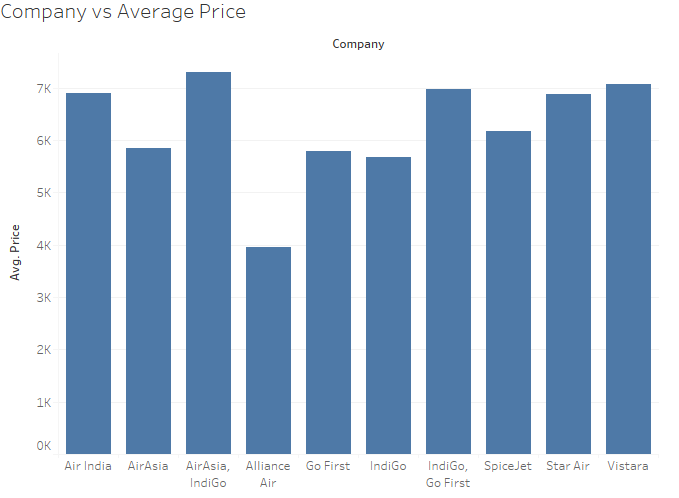

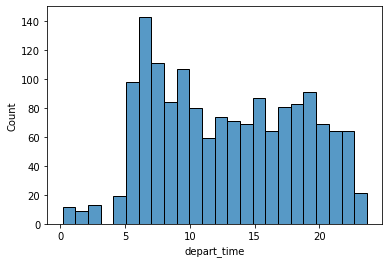

In [25]:
sns.histplot(df['depart_time'],bins=24)
#There are very less number of flights between 12am to 5 am
#There are very high number of flights bewtween 5 am to 10 am 
#There are good number of flights between 10:00 and 20:00
# After 20:00, the number of flights goes on decreasing

<AxesSubplot:xlabel='depart_time', ylabel='Density'>

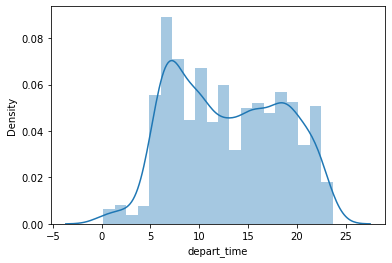

In [27]:
sns.distplot(df['depart_time'],bins=20)

<AxesSubplot:xlabel='depart_time', ylabel='price'>

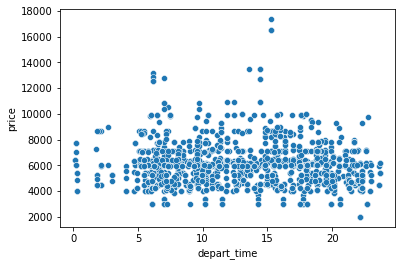

In [28]:
sns.scatterplot(df['depart_time'],df['price'])

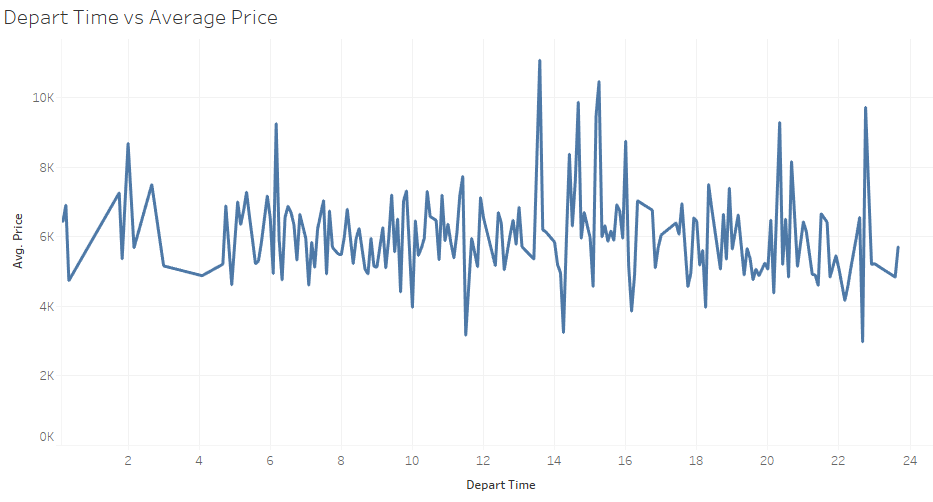

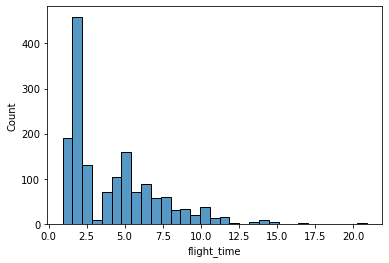

In [31]:
sns.histplot(df['flight_time'])
plt.show()

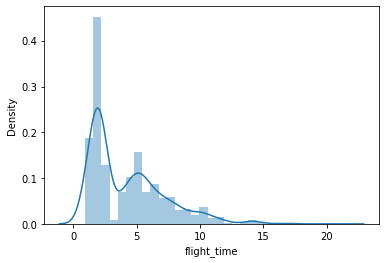

In [32]:
sns.distplot(df['flight_time'])
plt.show()

#skewness is present in data
#most of the flights have less flight time.

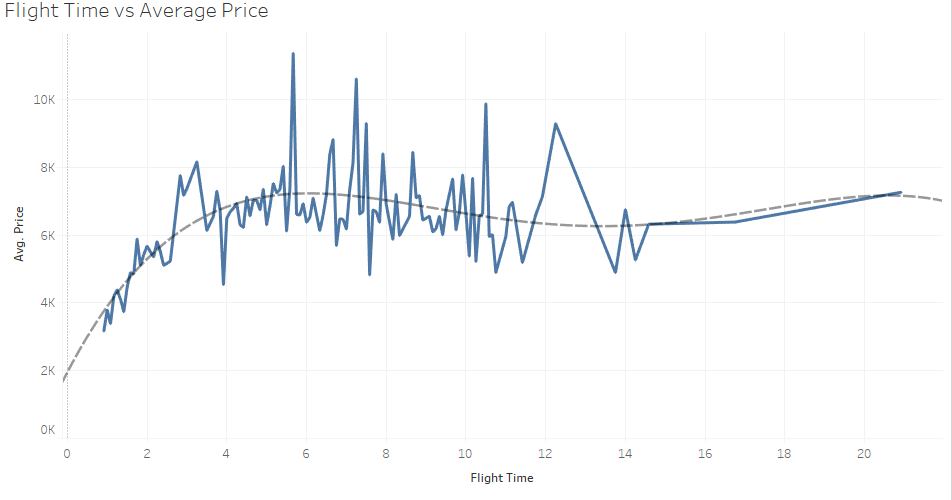

In [33]:
#Average price initially shows an increase with flight time but then it doesnot show much variation with flight time.

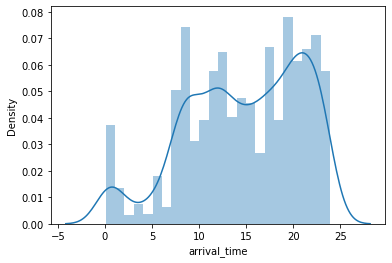

In [34]:
sns.distplot(df['arrival_time'],bins=24)
plt.show()

#skewness is present in data.

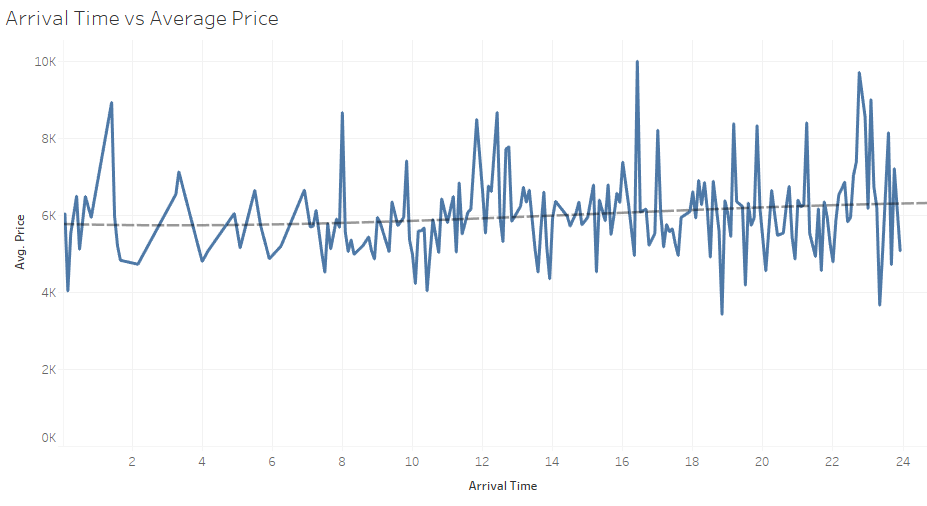
Average price doesnot show much variation with arrival time

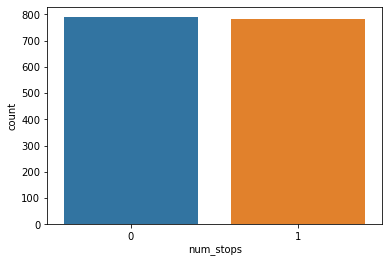

In [36]:
sns.countplot(df['num_stops'])
plt.show()

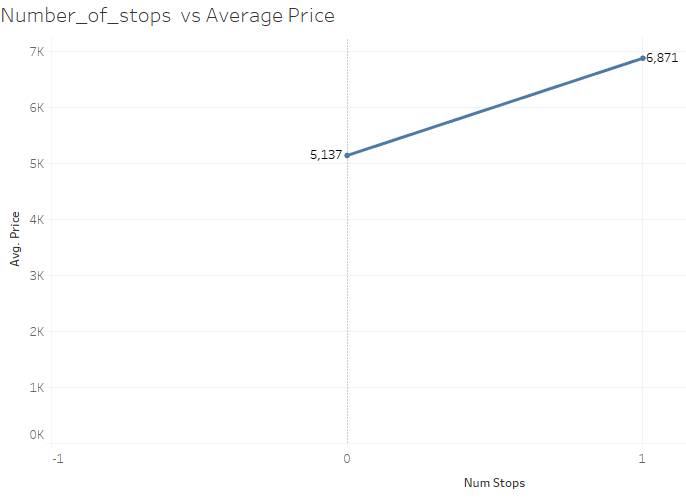
Average price increases with number of stops

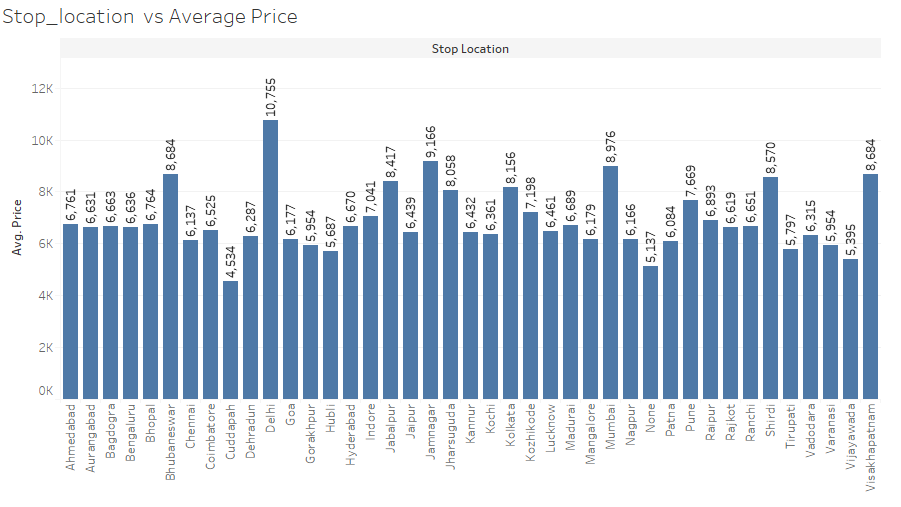

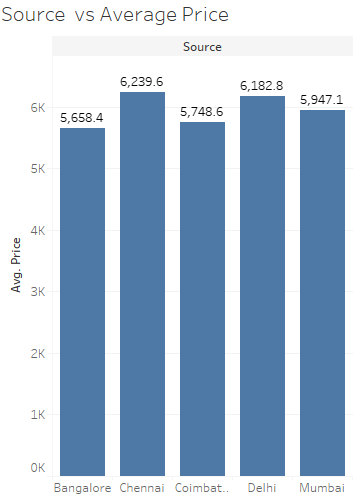

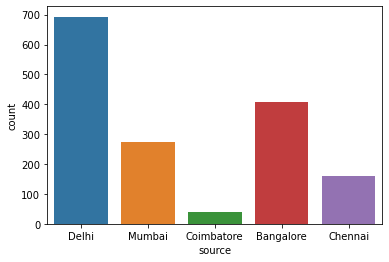

In [37]:
sns.countplot(df['source'])
plt.show()

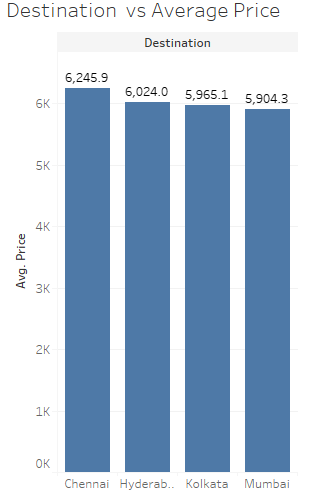

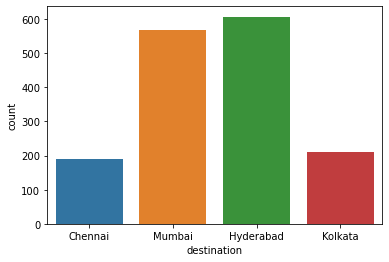

In [38]:
sns.countplot(df['destination'])
plt.show()

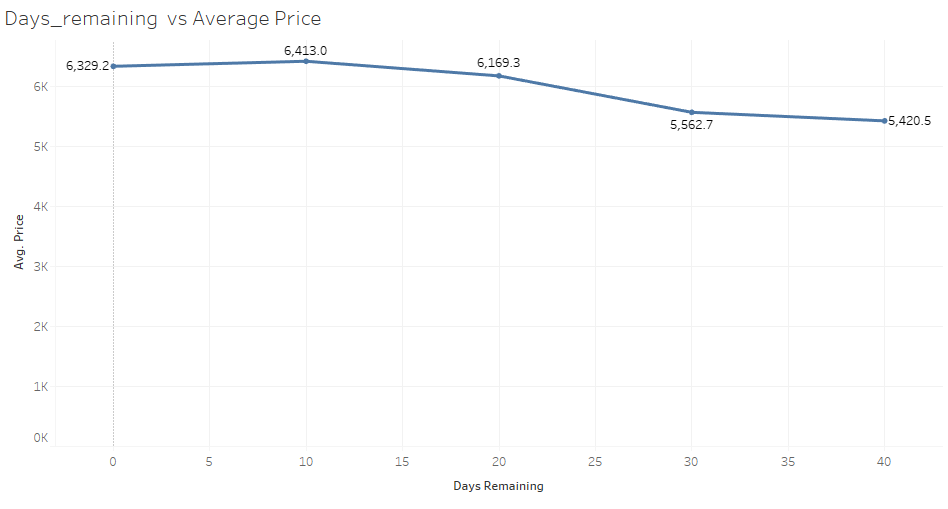
Earlier the ticket is bought, lower is the price

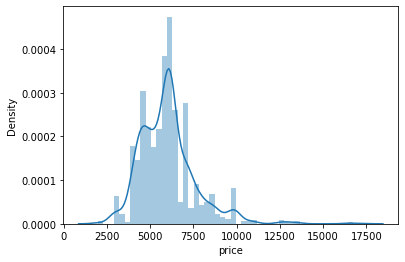

In [41]:
sns.distplot(df['price'])
plt.show()

# Data PreProcessing

In [17]:
le_company=LabelEncoder() #initiating object from class
df['Company']=le_company.fit_transform(df['Company'])

In [18]:
le_stop=LabelEncoder() #initiating object from class
df['stop_location']=le_stop.fit_transform(df['stop_location'])

In [19]:
le_source=LabelEncoder()
df['source']=le_source.fit_transform(df['source'])

In [20]:
le_desitnation=LabelEncoder()
df['destination']=le_desitnation.fit_transform(df['destination'])

In [21]:
df.dtypes

Company             int32
depart_time       float64
flight_time       float64
arrival_time      float64
num_stops           int64
stop_location       int32
source              int32
destination         int32
days_remaining      int64
price               int64
dtype: object

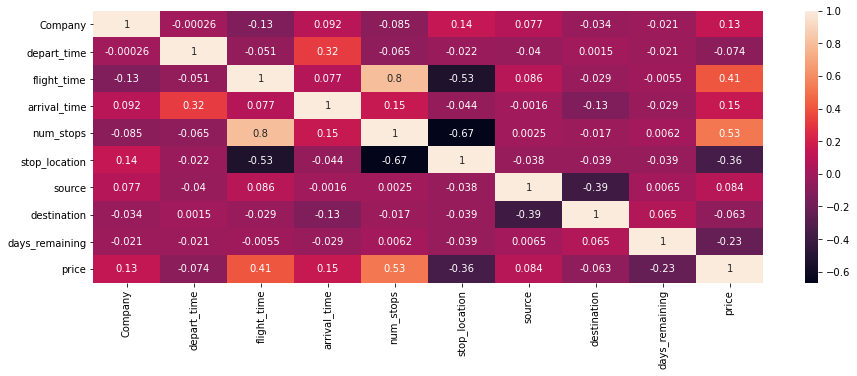

In [22]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)
plt.show()


#all the columns has low correlation with target.
#since the number of columns is less, we are not dropping any columns

In [23]:
df.skew()

Company          -0.360519
depart_time       0.084732
flight_time       1.238867
arrival_time     -0.474022
num_stops         0.006363
stop_location    -0.770404
source           -0.439803
destination      -0.036103
days_remaining    0.050146
price             1.439605
dtype: float64

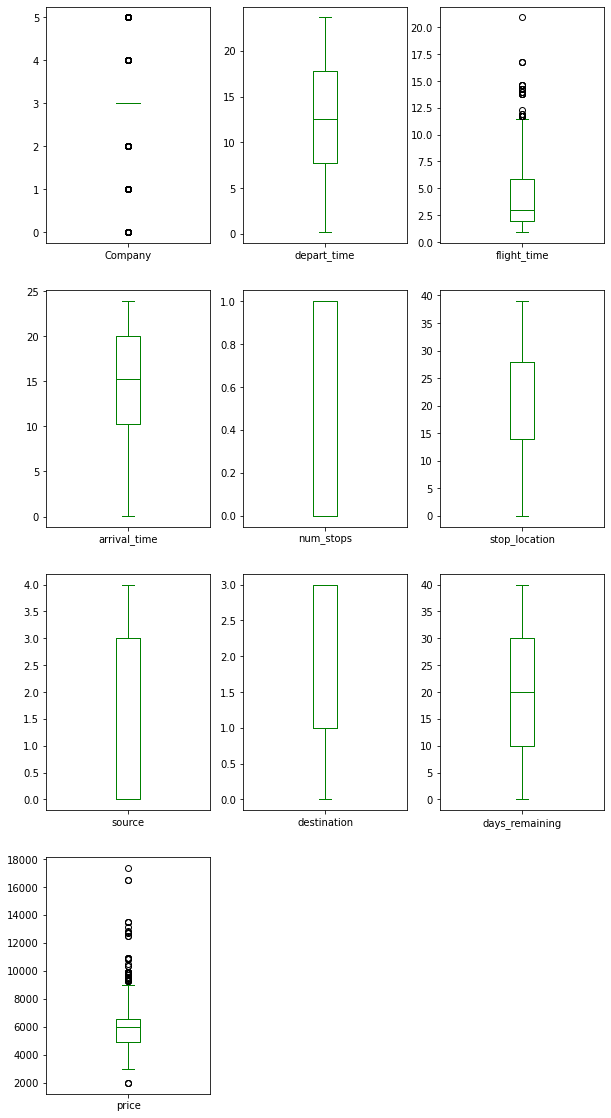

In [60]:
df.plot(kind='box',subplots=True,layout=(4,3),figsize=(10,20),color='green')
plt.show()

In [24]:
#outlier removal
from scipy.stats import zscore
z=np.abs(zscore(df))


df_new=df[(z<3.0).all(axis=1)]
print(df.shape)
print(df_new.shape)

print("loss_percent= ",(df.shape[0]-df_new.shape[0])/df.shape[0]*100)

(1573, 10)
(1535, 10)
loss_percent=  2.4157660521296886


In [25]:
df=df_new

# Model testing and training starts

##### Trying Linear Regression

In [63]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('r2_score is:',r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

r2_score is: 0.3694033917159647
root_mean_sqaured_error: 1083.9718280428256
mean_absolute_error: 776.9278872822908


In [68]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt_price=PowerTransformer()
y=pt_price.fit_transform(y.values.reshape(-1,1))

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('r2_score is:',r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

r2_score is: 0.3832956215067562
root_mean_sqaured_error: 0.7333966402875125
mean_absolute_error: 0.529655178933554


In [69]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt_f_t=PowerTransformer()
x['flight_time']=pt_f_t.fit_transform(x['flight_time'].values.reshape(-1,1))

pt_price=PowerTransformer()
y=pt_price.fit_transform(y.values.reshape(-1,1))

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('r2_score is:',r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

r2_score is: 0.3997120104608569
root_mean_sqaured_error: 0.72356945856335
mean_absolute_error: 0.5230171219545866


In [73]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt_f_t=PowerTransformer()
x['flight_time']=pt_f_t.fit_transform(x['flight_time'].values.reshape(-1,1))

pt_price=PowerTransformer()
y=pt_price.fit_transform(y.values.reshape(-1,1))

pt_dr=PowerTransformer()
x['days_remaining']=pt_f_t.fit_transform(x['days_remaining'].values.reshape(-1,1))

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('r2_score is:',r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

r2_score is: 0.39527646891031376
root_mean_sqaured_error: 0.7262377741327307
mean_absolute_error: 0.5248848890614793


In [74]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt_f_t=PowerTransformer()
x['flight_time']=pt_f_t.fit_transform(x['flight_time'].values.reshape(-1,1))

pt_price=PowerTransformer()
y=pt_price.fit_transform(y.values.reshape(-1,1))

#pt_dr=PowerTransformer()
#x['days_remaining']=pt_f_t.fit_transform(x['days_remaining'].values.reshape(-1,1))

pt_f_t=PowerTransformer()
x['depart_time']=pt_f_t.fit_transform(x['depart_time'].values.reshape(-1,1))

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('r2_score is:',r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

r2_score is: 0.39953717055852167
root_mean_sqaured_error: 0.7236748243255118
mean_absolute_error: 0.5232056772024823


##### Trying KNN Regression

In [79]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
KNN=KNeighborsRegressor()
KNN.fit(x_train,y_train)
y_pred_knn=KNN.predict(x_test)
print('r2_score is:',r2_score(y_test,y_pred_knn))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred_knn)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred_knn))

r2_score is: 0.3996544567514926
root_mean_sqaured_error: 1057.6520741564434
mean_absolute_error: 736.3837133550488


In [82]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt_f_t=PowerTransformer()
x['flight_time']=pt_f_t.fit_transform(x['flight_time'].values.reshape(-1,1))

pt_price=PowerTransformer()
y=pt_price.fit_transform(y.values.reshape(-1,1))


scaler = StandardScaler()
x_knc=scaler.fit_transform(x)

scaler_y=StandardScaler()


x_train,x_test,y_train,y_test=train_test_split(x_knc,y,test_size=0.20,random_state=42)

rfr=KNeighborsRegressor()
rfr.fit(x_train,scaler_y.fit_transform(y_train))
y_pred_rfr=rfr.predict(x_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,scaler_y.inverse_transform(y_pred_rfr)))
print('root_mean_sqaured_error:',mean_squared_error(y_test,scaler_y.inverse_transform(y_pred_rfr))**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,scaler_y.inverse_transform(y_pred_rfr)))

r2_score for RandomForestRegression is:  0.6332234112367277
root_mean_sqaured_error: 0.5655893246690884
mean_absolute_error: 0.36492771624334397


In [83]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]



scaler = StandardScaler()
x_knc=scaler.fit_transform(x)

scaler_y=StandardScaler()


x_train,x_test,y_train,y_test=train_test_split(x_knc,y,test_size=0.20,random_state=42)

rfr=KNeighborsRegressor()
rfr.fit(x_train,scaler_y.fit_transform(y_train.values.reshape(-1,1)))
y_pred_rfr=rfr.predict(x_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,scaler_y.inverse_transform(y_pred_rfr)))
print('root_mean_sqaured_error:',mean_squared_error(y_test,scaler_y.inverse_transform(y_pred_rfr))**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,scaler_y.inverse_transform(y_pred_rfr)))

r2_score for RandomForestRegression is:  0.6265001308193509
root_mean_sqaured_error: 834.2330799370388
mean_absolute_error: 536.0684039087948


In [84]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt_f_t=PowerTransformer()
x['flight_time']=pt_f_t.fit_transform(x['flight_time'].values.reshape(-1,1))

pt_price=PowerTransformer()
y=pt_price.fit_transform(y.values.reshape(-1,1))

pt_dr=PowerTransformer()
x['days_remaining']=pt_f_t.fit_transform(x['days_remaining'].values.reshape(-1,1))

pt_f_t=PowerTransformer()
x['depart_time']=pt_f_t.fit_transform(x['depart_time'].values.reshape(-1,1))

scaler = StandardScaler()
x_knc=scaler.fit_transform(x)

scaler_y=StandardScaler()


x_train,x_test,y_train,y_test=train_test_split(x_knc,y,test_size=0.20,random_state=42)

rfr=KNeighborsRegressor()
rfr.fit(x_train,scaler_y.fit_transform(y_train))
y_pred_rfr=rfr.predict(x_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,scaler_y.inverse_transform(y_pred_rfr)))
print('root_mean_sqaured_error:',mean_squared_error(y_test,scaler_y.inverse_transform(y_pred_rfr))**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,scaler_y.inverse_transform(y_pred_rfr)))

r2_score for RandomForestRegression is:  0.6473412604604503
root_mean_sqaured_error: 0.5545972677266756
mean_absolute_error: 0.36436835732634404


In [85]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt_f_t=PowerTransformer()
x['flight_time']=pt_f_t.fit_transform(x['flight_time'].values.reshape(-1,1))

pt_price=PowerTransformer()
y=pt_price.fit_transform(y.values.reshape(-1,1))

pt_dr=PowerTransformer()
x['days_remaining']=pt_f_t.fit_transform(x['days_remaining'].values.reshape(-1,1))

pt_f_t=PowerTransformer()
x['depart_time']=pt_f_t.fit_transform(x['depart_time'].values.reshape(-1,1))

pt_f_t=PowerTransformer()
x['arrival_time']=pt_f_t.fit_transform(x['arrival_time'].values.reshape(-1,1))

scaler = StandardScaler()
x_knc=scaler.fit_transform(x)

scaler_y=StandardScaler()


x_train,x_test,y_train,y_test=train_test_split(x_knc,y,test_size=0.20,random_state=42)

rfr=KNeighborsRegressor()
rfr.fit(x_train,scaler_y.fit_transform(y_train))
y_pred_rfr=rfr.predict(x_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,scaler_y.inverse_transform(y_pred_rfr)))
print('root_mean_sqaured_error:',mean_squared_error(y_test,scaler_y.inverse_transform(y_pred_rfr))**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,scaler_y.inverse_transform(y_pred_rfr)))

#best result in KNN Regressor.

r2_score for RandomForestRegression is:  0.65040157658329
root_mean_sqaured_error: 0.5521856712828045
mean_absolute_error: 0.36261269991796363


In [87]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt_x=PowerTransformer()
x=pt_x.fit_transform(x)

pt_price=PowerTransformer()
y=pt_price.fit_transform(y.values.reshape(-1,1))


scaler = StandardScaler()
x_knc=scaler.fit_transform(x)

scaler_y=StandardScaler()


x_train,x_test,y_train,y_test=train_test_split(x_knc,y,test_size=0.20,random_state=42)

rfr=KNeighborsRegressor()
rfr.fit(x_train,scaler_y.fit_transform(y_train))
y_pred_rfr=rfr.predict(x_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,scaler_y.inverse_transform(y_pred_rfr)))
print('root_mean_sqaured_error:',mean_squared_error(y_test,scaler_y.inverse_transform(y_pred_rfr))**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,scaler_y.inverse_transform(y_pred_rfr)))

r2_score for RandomForestRegression is:  0.646211937113139
root_mean_sqaured_error: 0.5554845547213474
mean_absolute_error: 0.36704535743458727


In [88]:
#Now applying GridSearchCV on KNNRegressor
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt_x=PowerTransformer()
x=pt_x.fit_transform(x)

pt_price=PowerTransformer()
y=pt_price.fit_transform(y.values.reshape(-1,1))

scaler = StandardScaler()
x_knc=scaler.fit_transform(x)

scaler_y=StandardScaler()
y_knc=scaler_y.fit_transform(y)

knr=KNeighborsRegressor()
parameters={'n_neighbors':[5,6,7,9,10,11],"weights":['uniform','distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'p':[1,2]}
gd_sr=GridSearchCV(estimator=knr, param_grid= parameters,scoring='r2')
gd_sr.fit(x_knc,y_knc)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'algorithm': 'ball_tree', 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
0.46826222020700303


In [89]:
#Now applying GridSearchCV on KNNRegressor
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt_x=PowerTransformer()
x=pt_x.fit_transform(x)

pt_price=PowerTransformer()
y=pt_price.fit_transform(y.values.reshape(-1,1))

scaler = StandardScaler()
x_knc=scaler.fit_transform(x)

scaler_y=StandardScaler()
y_knc=scaler_y.fit_transform(y)

knr=KNeighborsRegressor()
parameters={'n_neighbors':[7,9,10,11,12,13],"weights":['uniform','distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'p':[1,2]}
gd_sr=GridSearchCV(estimator=knr, param_grid= parameters,scoring='r2')
gd_sr.fit(x_knc,y_knc)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'algorithm': 'brute', 'n_neighbors': 13, 'p': 1, 'weights': 'distance'}
0.47156798270120026


In [92]:
#Now applying GridSearchCV on KNNRegressor
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt_x=PowerTransformer()
x=pt_x.fit_transform(x)

pt_price=PowerTransformer()
y=pt_price.fit_transform(y.values.reshape(-1,1))

scaler = StandardScaler()
x_knc=scaler.fit_transform(x)

scaler_y=StandardScaler()
y_knc=scaler_y.fit_transform(y)

knr=KNeighborsRegressor()
parameters={'n_neighbors':[3,4,5,6,10,11,12,13,14,15],"weights":['uniform','distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'p':[1,2]}
gd_sr=GridSearchCV(estimator=knr, param_grid= parameters,scoring='r2')
gd_sr.fit(x_knc,y_knc)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'algorithm': 'brute', 'n_neighbors': 13, 'p': 1, 'weights': 'distance'}
0.47156798270120026


In [91]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt_x=PowerTransformer()
x=pt_x.fit_transform(x)

pt_price=PowerTransformer()
y=pt_price.fit_transform(y.values.reshape(-1,1))


scaler = StandardScaler()
x_knc=scaler.fit_transform(x)

scaler_y=StandardScaler()


x_train,x_test,y_train,y_test=train_test_split(x_knc,y,test_size=0.20,random_state=42)

rfr=KNeighborsRegressor(algorithm='brute',n_neighbors=13,p=1,weights='distance')
rfr.fit(x_train,scaler_y.fit_transform(y_train))
y_pred_rfr=rfr.predict(x_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,scaler_y.inverse_transform(y_pred_rfr)))
print('root_mean_sqaured_error:',mean_squared_error(y_test,scaler_y.inverse_transform(y_pred_rfr))**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,scaler_y.inverse_transform(y_pred_rfr)))

r2_score for RandomForestRegression is:  0.673424365671921
root_mean_sqaured_error: 0.5336939624042659
mean_absolute_error: 0.3416205643476891


##### Trying the Random Forest Regressor

In [26]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

#pt_x=PowerTransformer()
#x_pt=pt_x.fit_transform(x)



x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
knr=RandomForestRegressor()
knr.fit(x_train,y_train)
y_pred=knr.predict(x_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

r2_score for RandomForestRegression is:  0.7105501795005966
root_mean_sqaured_error: 734.3934964646784
mean_absolute_error: 396.62382615945404


In [45]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt_price=PowerTransformer()
y=pt_price.fit_transform(y.values.reshape(-1,1))

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
knr=RandomForestRegressor()
knr.fit(x_train,y_train)
y_pred=knr.predict(x_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

r2_score for RandomForestRegression is:  0.7403150840677857
root_mean_sqaured_error: 0.4759088293237978
mean_absolute_error: 0.26635222348374304


In [44]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt_f_t=PowerTransformer()
#x['flight_time']=pt_f_t.fit_transform(x['flight_time'].values.reshape(-1,1))

pt_dr=PowerTransformer()
#x['days_remaining']=pt_f_t.fit_transform(x['days_remaining'].values.reshape(-1,1))

pt_f_t=PowerTransformer()
#x['depart_time']=pt_f_t.fit_transform(x['depart_time'].values.reshape(-1,1))

pt_f_t=PowerTransformer()
#x['arrival_time']=pt_f_t.fit_transform(x['arrival_time'].values.reshape(-1,1))

pt_price=PowerTransformer()
y=pt_price.fit_transform(y.values.reshape(-1,1))

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
knr=RandomForestRegressor()
knr.fit(x_train,y_train)
y_pred=knr.predict(x_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

#we are getting better results without applying power tranformer.

r2_score for RandomForestRegression is:  0.7273400975717133
root_mean_sqaured_error: 0.48765315424183164
mean_absolute_error: 0.26942006177372657


In [34]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt_x=PowerTransformer()
x_pt=pt_x.fit_transform(x)



x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
knr=RandomForestRegressor()
knr.fit(x_train,y_train)
y_pred=knr.predict(x_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

#we are getting better results without power transformer.

r2_score for RandomForestRegression is:  0.7096903481537982
root_mean_sqaured_error: 735.4834717462038
mean_absolute_error: 390.774600938421


In [38]:
#Applying GridSearchCV on RandomForestRegressor.
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt_price=PowerTransformer()
y=pt_price.fit_transform(y.values.reshape(-1,1))

rfr=RandomForestRegressor()
parameters={'n_estimators':[80,90,100,110,120],'criterion':['squared_error','absolute_error','poisson'],'max_depth':[10,12,13,15,17,'None'],'min_samples_split':[2,5,7,10],'min_samples_leaf':[1,2,4],'max_features':['sqrt','log2','None']}
gd_sr=GridSearchCV(estimator=rfr, param_grid= parameters,scoring='r2')
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)


{'criterion': 'absolute_error', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.5781128585605956


In [47]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt_price=PowerTransformer()
y=pt_price.fit_transform(y.values.reshape(-1,1))

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
knr=RandomForestRegressor(criterion='absolute_error',max_depth=12,max_features='sqrt')
knr.fit(x_train,y_train)
y_pred=knr.predict(x_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

r2_score for RandomForestRegression is:  0.724163709552472
root_mean_sqaured_error: 0.490485419750274
mean_absolute_error: 0.29727066528791446


In [49]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt_price=PowerTransformer()
y=pt_price.fit_transform(y.values.reshape(-1,1))

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
knr=RandomForestRegressor(criterion='absolute_error',max_depth=12,max_features='sqrt')
knr.fit(x_train,y_train)
y_pred=knr.predict(x_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

#criterion='absolute_error',max_depth=12,max_features='sqrt'
#unfortunately r2_score decreases after hyperparameter tuning.
#So we need to try other models.

r2_score for RandomForestRegression is:  0.7168713228803405
root_mean_sqaured_error: 0.496926697649044
mean_absolute_error: 0.3003676832582708


In [67]:
max_r2_score=0
best_rand_state=0

x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt_price=PowerTransformer()
y=pt_price.fit_transform(y.values.reshape(-1,1))

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    gbr=RandomForestRegressor(criterion='absolute_error',max_depth=12,max_features='sqrt')
    gbr.fit(x_train,y_train)
    y_pred=gbr.predict(x_test)
    
    if r2_score(y_test,y_pred)>max_r2_score:
        max_r2_score=r2_score(y_test,y_pred)
        best_rand_state=i

print(max_r2_score)
print(best_rand_state)

0.874401604763342
27


##### Trying decision tree regressor.

In [52]:
from sklearn.tree import DecisionTreeRegressor
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt_price=PowerTransformer()
y=pt_price.fit_transform(y.values.reshape(-1,1))

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
knr=DecisionTreeRegressor()
knr.fit(x_train,y_train)
y_pred=knr.predict(x_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

#The accuracy is far lower than the deafult RandomForestRegressor. So we are not working more on this model.

r2_score for RandomForestRegression is:  0.5776379776617921
root_mean_sqaured_error: 0.60693590551355
mean_absolute_error: 0.27562151871558904


##### Trying GradientBoosting Regressor

In [57]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt_price=PowerTransformer()
y=pt_price.fit_transform(y.values.reshape(-1,1))

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
knr=GradientBoostingRegressor(n_estimators=1000)
knr.fit(x_train,y_train)
y_pred=knr.predict(x_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

r2_score for RandomForestRegression is:  0.7064066568990436
root_mean_sqaured_error: 0.5060267812477234
mean_absolute_error: 0.3217051143037438


In [58]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt_x=PowerTransformer()
x_pt=pt_x.fit_transform(x)

pt_price=PowerTransformer()
y=pt_price.fit_transform(y.values.reshape(-1,1))

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
knr=GradientBoostingRegressor(n_estimators=1000)
knr.fit(x_train,y_train)
y_pred=knr.predict(x_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

r2_score for RandomForestRegression is:  0.7060886854347175
root_mean_sqaured_error: 0.5063007291051714
mean_absolute_error: 0.32180720059674167


In [64]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt_f_t=PowerTransformer()
#x['flight_time']=pt_f_t.fit_transform(x['flight_time'].values.reshape(-1,1))

pt_dr=PowerTransformer()
#x['days_remaining']=pt_f_t.fit_transform(x['days_remaining'].values.reshape(-1,1))

pt_f_t=PowerTransformer()
#x['depart_time']=pt_f_t.fit_transform(x['depart_time'].values.reshape(-1,1))

pt_f_t=PowerTransformer()
#x['arrival_time']=pt_f_t.fit_transform(x['arrival_time'].values.reshape(-1,1))

pt_price=PowerTransformer()
y=pt_price.fit_transform(y.values.reshape(-1,1))

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
knr=GradientBoostingRegressor(n_estimators=1000)
knr.fit(x_train,y_train)
y_pred=knr.predict(x_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

r2_score for RandomForestRegression is:  0.7064408236188744
root_mean_sqaured_error: 0.5059973361347736
mean_absolute_error: 0.3219003317079957


In [65]:
#Applying hyper parameter tuning on GradientBoostingregressor
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt_price=PowerTransformer()
y=pt_price.fit_transform(y.values.reshape(-1,1))

gbr=GradientBoostingRegressor(n_estimators=1000)
parameters={'criterion':['friedman_mse','squared_error','mse'],'loss':['squared_error','absolute_error','huber','quantile'],'learning_rate': [0.01,0.5,0.1],'max_depth': [3,4,5],'min_samples_leaf': [1,4,5,6]}
gd_sr=GridSearchCV(estimator=gbr, param_grid= parameters,scoring='r2')
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'absolute_error', 'max_depth': 3, 'min_samples_leaf': 1}
0.580394572900347


In [66]:
max_r2_score=0
best_rand_state=0

x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt_price=PowerTransformer()
y=pt_price.fit_transform(y.values.reshape(-1,1))

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    gbr=GradientBoostingRegressor(n_estimators=1000,criterion='friedman_mse',max_depth=3,min_samples_leaf=1,loss='absolute_error')
    gbr.fit(x_train,y_train)
    y_pred=gbr.predict(x_test)
    
    if r2_score(y_test,y_pred)>max_r2_score:
        max_r2_score=r2_score(y_test,y_pred)
        best_rand_state=i

print(max_r2_score)
print(best_rand_state)

0.8307491846654054
27


Random Forest Regressor has given the best accuracy till now.
So we are building a final Random Forest Regressor model.

# Building the final model

In [72]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

pt_price=PowerTransformer()
#y=pt_price.fit_transform(y.values.reshape(-1,1))

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=27)
gbr=RandomForestRegressor(criterion='absolute_error',max_depth=12,max_features='sqrt')
gbr.fit(x_train,pt_price.fit_transform(y_train.values.reshape(-1,1)))
y_pred=gbr.predict(x_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,pt_price.inverse_transform(y_pred.reshape(-1,1))))
print('root_mean_sqaured_error:',mean_squared_error(y_test,pt_price.inverse_transform(y_pred.reshape(-1,1)))**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,pt_price.inverse_transform(y_pred.reshape(-1,1))))


r2_score for RandomForestRegression is:  0.8590667154019916
root_mean_sqaured_error: 537.5972113528644
mean_absolute_error: 339.30919808467246


# Saving the final model

In [77]:
import pickle
filename='flight_price.pkl'
pickle.dump(gbr,open(filename,'wb'))